#INTRODUCTION

The aim of this report is to evaluate the performance of three different machine learning models in predicting the stock prices of AMD which is the target variable based on the feature of NVIDIA stock prices.  The models considered are K-Nearest Neighbors (kNN), Decision Tree, and Random Forest. The assessment criteria primarily rely on Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) metrics. Additionally, cross-validation values were employed to ensure statistical accuracy in model evaluation. These metrics collectively offer a comprehensive understanding of the models' predictive performance and generalization capabilities. While MSE and RMSE quantify the magnitude of prediction errors, R² provides insights into the proportion of variance in the target variable explained by the model. Furthermore, cross-validation helps in validating the models' robustness by assessing their performance across multiple subsets of the data.


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# to be used a prefix for all files
path_prefix = "/content/drive/My Drive/Sophomore/CS210/PROJECT/PHASE1/"
path_prefix2 = "/content/drive/My Drive/Sophomore/CS210/PROJECT/PHASE2/datasets/"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

import requests
from bs4 import BeautifulSoup

In [ ]:
us_stock_data = pd.read_csv(join(path_prefix,"Stock_Market_Dataset.csv"))

In [ ]:
amd = pd.read_csv(join(path_prefix2,"AMD.csv"))

#AMD Advanced Micro Device Dataset

In [ ]:
amd_data = amd[['Date','Price']]
amd_data['Date'] = pd.to_datetime(amd_data['Date'], format = '%m/%d/%Y')

<ipython-input-5-a844a8008b5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amd_data['Date'] = pd.to_datetime(amd_data['Date'], format = '%m/%d/%Y')


In [ ]:
amd_data['Price'] = amd_data['Price'].astype(float)

min_price = amd_data['Price'].min()
max_price = amd_data['Price'].max()


amd_data['AMD_Price_Normalized'] = ((amd_data['Price'] - min_price) / (max_price - min_price)) * 99 + 1



<ipython-input-6-77ced788e015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amd_data['Price'] = amd_data['Price'].astype(float)
<ipython-input-6-77ced788e015>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amd_data['AMD_Price_Normalized'] = ((amd_data['Price'] - min_price) / (max_price - min_price)) * 99 + 1


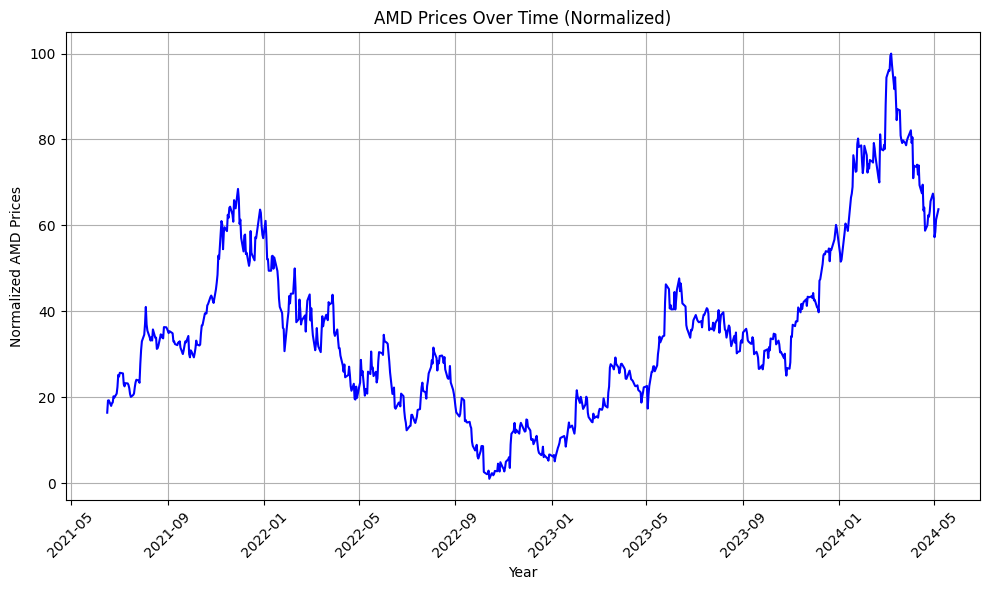

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(amd_data['Date'], amd_data['AMD_Price_Normalized'], color='b', linestyle='-')

plt.title('AMD Prices Over Time (Normalized)')
plt.xlabel('Year')
plt.ylabel('Normalized AMD Prices')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Nvidia Dataset

In [ ]:
nvidia = us_stock_data[['Date','Nvidia_Price']]
nvidia['Date'] = pd.to_datetime(nvidia['Date'],format='%d-%m-%Y')

<ipython-input-7-1f36d2e9cd36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia['Date'] = pd.to_datetime(nvidia['Date'],format='%d-%m-%Y')


In [ ]:
min_price = nvidia['Nvidia_Price'].min()
max_price = nvidia['Nvidia_Price'].max()

nvidia['Nvidia_Price_Normalized'] = ((nvidia['Nvidia_Price'] - min_price) / (max_price - min_price)) * 99 + 1


nvidia


<ipython-input-8-98457ad1db47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia['Nvidia_Price_Normalized'] = ((nvidia['Nvidia_Price'] - min_price) / (max_price - min_price)) * 99 + 1


,Date,Nvidia_Price,Nvidia_Price_Normalized
0,2024-02-02,661.60,100.000000
1,2024-02-01,630.27,95.062214
2,2024-01-31,615.27,92.698129
3,2024-01-30,627.74,94.663472
4,2024-01-29,624.65,94.176471
...,...,...,...
1238,2019-02-08,37.04,1.565804
1239,2019-02-07,36.85,1.535859
1240,2019-02-06,38.25,1.756507
1241,2019-02-05,37.49,1.636727


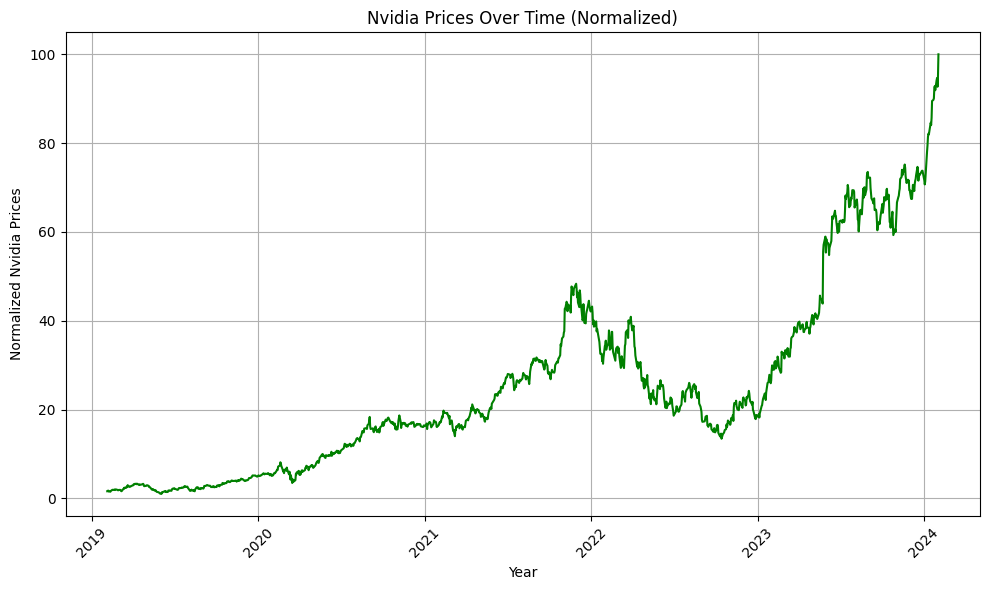

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(nvidia['Date'], nvidia['Nvidia_Price_Normalized'], color='g', linestyle='-')

plt.title('Nvidia Prices Over Time (Normalized)')
plt.xlabel('Year')
plt.ylabel('Normalized Nvidia Prices')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#AMD VS NVIDIA

In [ ]:
changed_amd_data = amd_data[((amd_data['Date'] <= '2024-02-02'))]

In [ ]:
changed_nvidia_data = nvidia[((nvidia['Date'] >= '2021-06-16') & (nvidia['Date'] <= '2024-05-06') )]

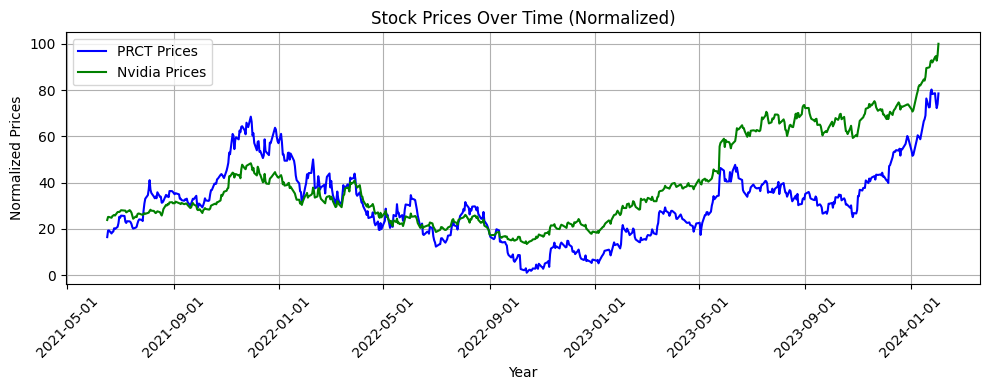

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(changed_amd_data['Date'], changed_amd_data['AMD_Price_Normalized'], color='b', linestyle='-', label='PRCT Prices')
ax.plot(changed_nvidia_data['Date'], changed_nvidia_data['Nvidia_Price_Normalized'], color='g', linestyle='-', label='Nvidia Prices')

ax.set_title('Stock Prices Over Time (Normalized)')
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Prices')

ax.grid(True)
ax.set_xticks(ax.get_xticks()[0::])
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
merged_data_nvidia_amd = pd.merge(changed_nvidia_data, changed_amd_data, on='Date', suffixes=('_nvidia', '_amd'))

merged_data_nvidia_amd

,Date,Nvidia_Price,Nvidia_Price_Normalized,Price,AMD_Price_Normalized
0,2024-02-02,661.60,100.000000,177.66,78.523675
1,2024-02-01,630.27,95.062214,170.48,73.950721
2,2024-01-31,615.27,92.698129,167.69,72.173765
3,2024-01-30,627.74,94.663472,172.06,74.957025
4,2024-01-29,624.65,94.176471,177.83,78.631948
...,...,...,...,...,...
649,2021-06-22,188.87,25.495073,83.58,18.603963
650,2021-06-21,184.27,24.770087,82.59,17.973430
651,2021-06-18,186.39,25.104211,84.65,19.285448
652,2021-06-17,186.57,25.132580,84.56,19.228127


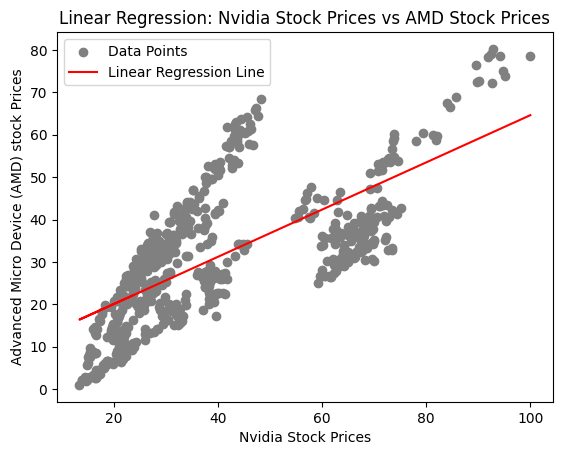

Pearson Correlation Coefficient: 0.6933885385197
p-value: 7.16851623314227e-95


In [ ]:

x = merged_data_nvidia_amd['Nvidia_Price_Normalized'].values.reshape(-1, 1)
y = merged_data_nvidia_amd['AMD_Price_Normalized'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)


correlation_coefficient, p_value = pearsonr(x.flatten(), y.flatten())


plt.scatter(x.flatten(), y.flatten(), color='gray', label='Data Points')
plt.plot(x.flatten(), model.predict(x).flatten(), color='red', label='Linear Regression Line')

plt.xlabel('Nvidia Stock Prices')
plt.ylabel('Advanced Micro Device (AMD) stock Prices')
plt.title('Linear Regression: Nvidia Stock Prices vs AMD Stock Prices')
plt.legend()

plt.show()

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

#Machine Learning Algorithms

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
X = merged_data_nvidia_amd[['Nvidia_Price_Normalized']]  # Features
y = merged_data_nvidia_amd['AMD_Price_Normalized']     # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Tuning the hyperparameters

###GridSearchCV

####kNN

The kNN model predicts the stock price of AMD based on the stock prices of Nvidia, utilizing the concept of similarity in a feature space. The grid search technique is employed to find the optimal hyperparameters for the kNN model, including the number of neighbors (n_neighbors) which are “3, 5, 7, 8, 9, 10,11”  and the weight function (uniform or distance). The best parameters obtained through grid search are then used to train the final kNN model.


In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 8, 9, 10,11],  # Example values for n_neighbors
    'weights': ['uniform', 'distance']  # Example values for weights
}

# Initialize kNN regressor
knn = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to build the final model
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train, y_train)

# Predict on the test set
best_knn_predictions = best_knn.predict(X_test)

# Evaluate the model
best_knn_mse = mean_squared_error(y_test, best_knn_predictions)
print(f'Best kNN Mean Squared Error: {best_knn_mse}')



Best Parameters: {'n_neighbors': 10, 'weights': 'uniform'}
Best kNN Mean Squared Error: 50.91954580796719


#####Actual vs. Predicted Graph

This table indicates how closely the predicted values match the actual values. A tighter clustering of data points around the regression line suggests a more accurate prediction by the model. The average residual (Mean Absolute Error) calculated for the kNN regression model is approximately 5.66. This value represents the average distance of each data point from the regression line. A lower MAE indicates that, on average, the model's predictions are closer to the actual values, implying more accurate predictions and a tighter clustering of data points around the regression line.
Therefore, with an MAE of 5.66, we can interpret that the kNN model exhibits reasonably accurate predictions in forecasting AMD stock prices based on NVIDIA stock price features.


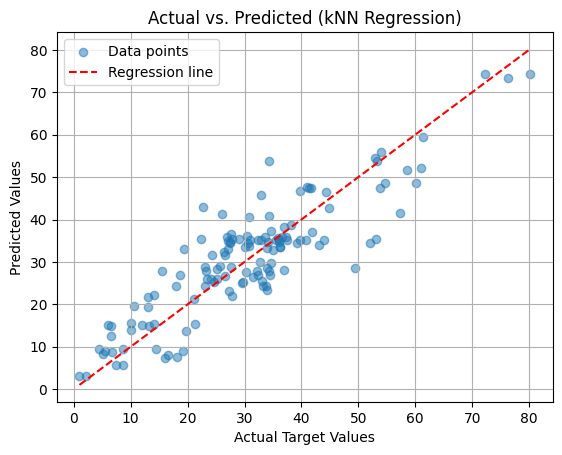

In [ ]:
# Scatter plot
plt.scatter(y_test, best_knn_predictions, alpha=0.5, label="Data points")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (kNN Regression)")

# Add regression line
x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, color='red', linestyle='--', label="Regression line")

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test - best_knn_predictions

# Calculate average residual (mean absolute error)
average_residual = np.mean(np.abs(residuals))

print(f'Average Residual (Mean Absolute Error): {average_residual}')


Average Residual (Mean Absolute Error): 5.6642439290779585


#####R^2

In [ ]:
r2 = r2_score(y_test, best_knn_predictions)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.7766218620284909


#####Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
std_cv_mse = cv_scores.std()
print(f'Mean Cross-Validated MSE: {mean_cv_mse}')
print(f'Standard Deviation of Cross-Validated MSE: {std_cv_mse}')


Mean Cross-Validated MSE: 59.97366463581445
Standard Deviation of Cross-Validated MSE: 4.3080516921035965


####Decision Tree

The Decision Tree model predicts AMD stock prices by recursively partitioning the feature space into segments based on the values of the Nvidia stock prices. The hyperparameters such as maximum depth of the tree (max_depth = [None, 10, 20, 30]), minimum samples required to split a node (min_samples_split = [2, 5, 10]), and minimum samples required at each leaf node (min_samples_leaf = [1, 2, 4]) are tuned using grid search. The optimal parameters are then utilized to train the final Decision Tree model.


In [ ]:
# Define the hyperparameters grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize Decision Tree regressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

# Use the best parameters to build the final Decision Tree model
best_dt = DecisionTreeRegressor(**best_params_dt)
best_dt.fit(X_train, y_train)

# Predict on the test set
best_dt_predictions = best_dt.predict(X_test)

# Evaluate the model
best_dt_mse = mean_squared_error(y_test, best_dt_predictions)
print(f'Best Decision Tree Mean Squared Error: {best_dt_mse}')


Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree Mean Squared Error: 64.411777094147


#####Actual vs. Predicted Graph

The average residual (Mean Absolute Error) calculated for the decision tree regression model is approximately 6.096. With an MAE of 6.096, we can interpret that the decision tree model exhibits reasonably accurate predictions in forecasting AMD stock prices based on NVIDIA stock price features.


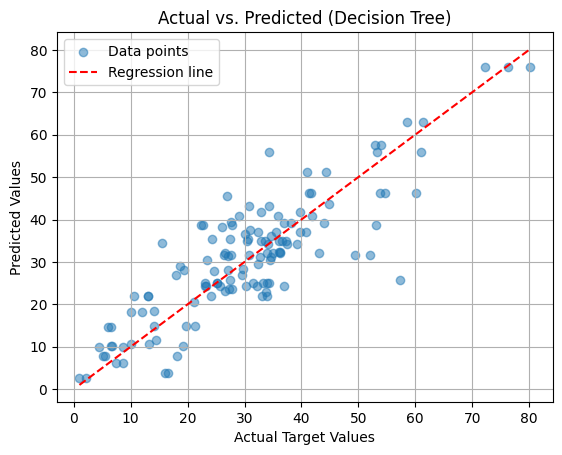

In [ ]:
# Scatter plot
plt.scatter(y_test, best_dt_predictions, alpha=0.5, label="Data points")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Decision Tree)")

# Add regression line
x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, color='red', linestyle='--', label="Regression line")

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test - best_dt_predictions

# Calculate average residual (mean absolute error)
average_residual = np.mean(np.abs(residuals))

print(f'Average Residual (Mean Absolute Error): {average_residual}')


Average Residual (Mean Absolute Error): 6.096907698187885


#####R^2


In [ ]:
r2_dt = r2_score(y_test, best_dt_predictions)
print(f'R-squared (R²): {r2_dt}')


R-squared (R²): 0.7174330092222623


#####Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
std_cv_mse = cv_scores.std()
print(f'Mean Cross-Validated MSE: {mean_cv_mse}')
print(f'Standard Deviation of Cross-Validated MSE: {std_cv_mse}')


Mean Cross-Validated MSE: 79.95404610201031
Standard Deviation of Cross-Validated MSE: 11.291072925187452


####Random Forest

The Random Forest model predicts AMD stock prices by constructing multiple decision trees and averaging their predictions. Similar to the Decision Tree model, hyperparameters such as the number of trees (n_estimators), maximum features to consider for the best split (max_features), maximum depth of the trees, and minimum samples required for splitting and at each leaf node are optimized using grid search. The best parameters are then used to train the final Random Forest model.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 20, 30],             # Number of trees in the forest. --------CHECK-------
    'max_features': ['auto', 'sqrt'],         # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required at each leaf node
}

# Initialize Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Use the best parameters to build the final Random Forest model
best_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test set
best_rf_predictions = best_rf.predict(X_test)

# Evaluate the model
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
print(f'Best Random Forest Mean Squared Error: {best_rf_mse}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}
Best Random Forest Mean Squared Error: 59.73420092933626


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


#####Actual vs. Predicted Graph
We can also interpret that the random forest model exhibits reasonably accurate predictions based on the result of MAE (5.8689) in forecasting AMD stock prices based on NVIDIA stock price feature

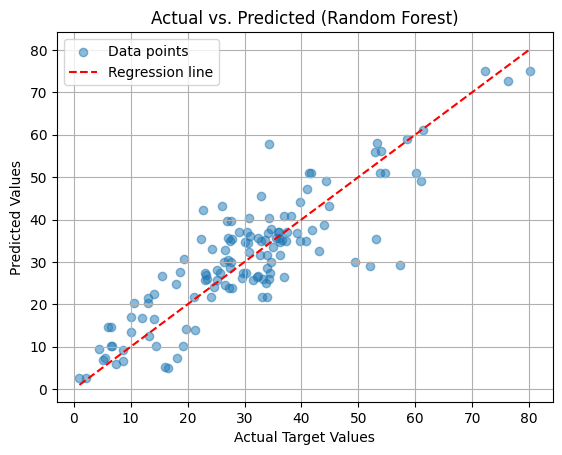

In [ ]:
# Scatter plot
plt.scatter(y_test, best_rf_predictions, alpha=0.5, label="Data points")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Random Forest)")

# Add regression line
x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, color='red', linestyle='--', label="Regression line")

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test - best_rf_predictions

# Calculate average residual (mean absolute error)
average_residual = np.mean(np.abs(residuals))

print(f'Average Residual (Mean Absolute Error): {average_residual}')


Average Residual (Mean Absolute Error): 5.868980942816966


#####R^2

In [ ]:
r2_dt = r2_score(y_test, best_rf_predictions)
print(f'R-squared (R²): {r2_dt}')

R-squared (R²): 0.7379529929993338


#####Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
std_cv_mse = cv_scores.std()
print(f'Mean Cross-Validated MSE: {mean_cv_mse}')
print(f'Standard Deviation of Cross-Validated MSE: {std_cv_mse}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean Cross-Validated MSE: 65.59205914847534
Standard Deviation of Cross-Validated MSE: 5.679105262586413


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


###Mean Squared Error of the models

In [ ]:
# Evaluate the model
best_dt_mse = mean_squared_error(y_test, best_dt_predictions)
print(f'Best Decision Tree Mean Squared Error: {best_dt_mse}')


# Evaluate the model
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
print(f'Best Random Forest Mean Squared Error: {best_rf_mse}')


# Evaluate the model
best_knn_mse = mean_squared_error(y_test, best_knn_predictions)
print(f'Best kNN Mean Squared Error: {best_knn_mse}')

Best Decision Tree Mean Squared Error: 64.411777094147
Best Random Forest Mean Squared Error: 59.73420092933626
Best kNN Mean Squared Error: 50.91954580796719


###Root Mean Squared Errors of the models

In [ ]:
# Calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate RMSE for Decision Tree
dt_rmse = rmse(y_test, best_dt_predictions)
print(f'Best Decision Tree Root Mean Squared Error: {dt_rmse}')

# Calculate RMSE for Random Forest
rf_rmse = rmse(y_test, best_rf_predictions)
print(f'Best Random Forest Root Mean Squared Error: {rf_rmse}')

# Calculate RMSE for kNN
knn_rmse = rmse(y_test, best_knn_predictions)
print(f'Best kNN Root Mean Squared Error: {knn_rmse}')


Best Decision Tree Root Mean Squared Error: 8.02569480444821
Best Random Forest Root Mean Squared Error: 7.728790392379409
Best kNN Root Mean Squared Error: 7.135793285120246


###R^2 Score of the Models


In [ ]:
r2 = r2_score(y_test, best_knn_predictions)
print(f'kNN, R-squared (R²): {r2}')

r2_dt = r2_score(y_test, best_dt_predictions)
print(f'Decision tree, R-squared (R²): {r2_dt}')

r2_dt = r2_score(y_test, best_rf_predictions)
print(f'Random Forest, R-squared (R²): {r2_dt}')

kNN, R-squared (R²): 0.7766218620284909
Decision tree, R-squared (R²): 0.7174330092222623
Random Forest, R-squared (R²): 0.7379529929993338


###Cross-validation of the models

In [ ]:
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
std_cv_mse = cv_scores.std()
print(f'kNN,Mean Cross-Validated MSE: {mean_cv_mse}')
print(f'kNN, Standard Deviation of Cross-Validated MSE: {std_cv_mse}')



cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
std_cv_mse = cv_scores.std()
print(f'Decision Tree, Mean Cross-Validated MSE: {mean_cv_mse}')
print(f'Decision Tree, Standard Deviation of Cross-Validated MSE: {std_cv_mse}')




cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
std_cv_mse = cv_scores.std()
print(f'Random Forest, Mean Cross-Validated MSE: {mean_cv_mse}')
print(f'Random Forest, Standard Deviation of Cross-Validated MSE: {std_cv_mse}')


kNN,Mean Cross-Validated MSE: 59.97366463581445
kNN, Standard Deviation of Cross-Validated MSE: 4.3080516921035965
Decision Tree, Mean Cross-Validated MSE: 79.95404610201031
Decision Tree, Standard Deviation of Cross-Validated MSE: 11.291072925187452


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Random Forest, Mean Cross-Validated MSE: 65.59205914847534
Random Forest, Standard Deviation of Cross-Validated MSE: 5.679105262586413


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


#CONCLUSION

The evaluation process of the machine learning models involved comprehensive analysis across various metrics to determine their effectiveness in predicting the target variable. Firstly, we assessed the models' predictive accuracy through the root mean squared error (RMSE). The k-nearest neighbors (kNN) model exhibited the lowest RMSE of 7.14, suggesting superior accuracy in predicting outcomes compared to the decision tree (RMSE: 8.03) and random forest (RMSE: 7.73) models. Subsequently, we evaluated the models' overall goodness of fit using the R-squared (R²) coefficient. Again, the kNN model emerged as the top performer with an R² value of 0.78, indicating its ability to explain approximately 78% of the variance in the target variable, better than the decision tree (R²: 0.72) and random forest (R²: 0.74) models. Additionally, we employed cross-validation to assess the models' generalization capabilities, where the kNN model demonstrated the lowest mean cross-validated mean squared error (MSE) of 59.97 with a standard deviation of 4.31, implying consistent and accurate predictions across different subsets of the data. Consequently, based on these comprehensive evaluations, the kNN model emerges as the preferred choice for its superior predictive performance, by its lower RMSE, higher R² coefficient, and more stable cross-validated MSE.
